In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [34]:
df = pd.read_csv("../data/landslideCleaned.csv")

top_countries = df[df['country_name'] != 'unknown']['country_name'].value_counts().head(10)

In [35]:
top_countries.head(10)

country_name
United States     1708
India              425
Nepal              179
Philippines        173
United Kingdom     119
China              119
Indonesia          108
Canada              85
Malaysia            74
Pakistan            61
Name: count, dtype: int64

### Question 1: Which countries are most vulnerable to landslides?

C:\Users\deshr\AppData\Local\Temp\ipykernel_23916\1783147995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


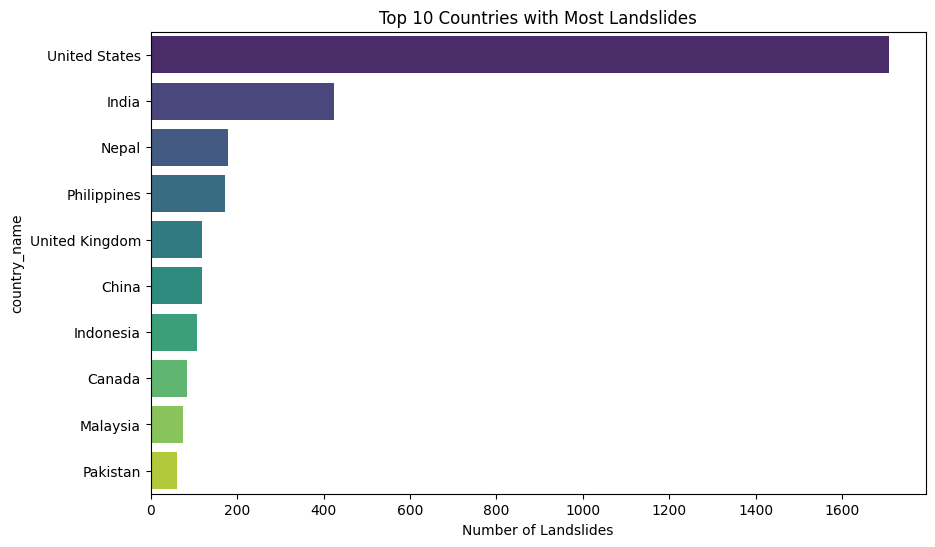

In [36]:

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Landslides')
plt.xlabel('Number of Landslides')
plt.show()


In [37]:
map_center = [df['latitude'].mean(), df['longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=2)
for _, row in df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=3, color='red', fill=True).add_to(map)
map.save("landslides_map.html")

map

In [38]:
df = df[df['landslide_trigger'] != 'unknown']
df = df[df['landslide_size'] != 'unknown']
df['landslide_trigger'] = df['landslide_trigger'].str.replace('_', ' ').str.title()

trigger_stats = df.groupby('landslide_trigger')[['fatality_count', 'injury_count']].mean().reset_index()

trigger_melted = trigger_stats.melt(id_vars='landslide_trigger', 
                                    value_vars=['fatality_count', 'injury_count'],
                                    var_name='Impact Type', value_name='Average Count')

### Question 2: How do certain landslide triggers correlate to the amount of injuries and fatalities caused?

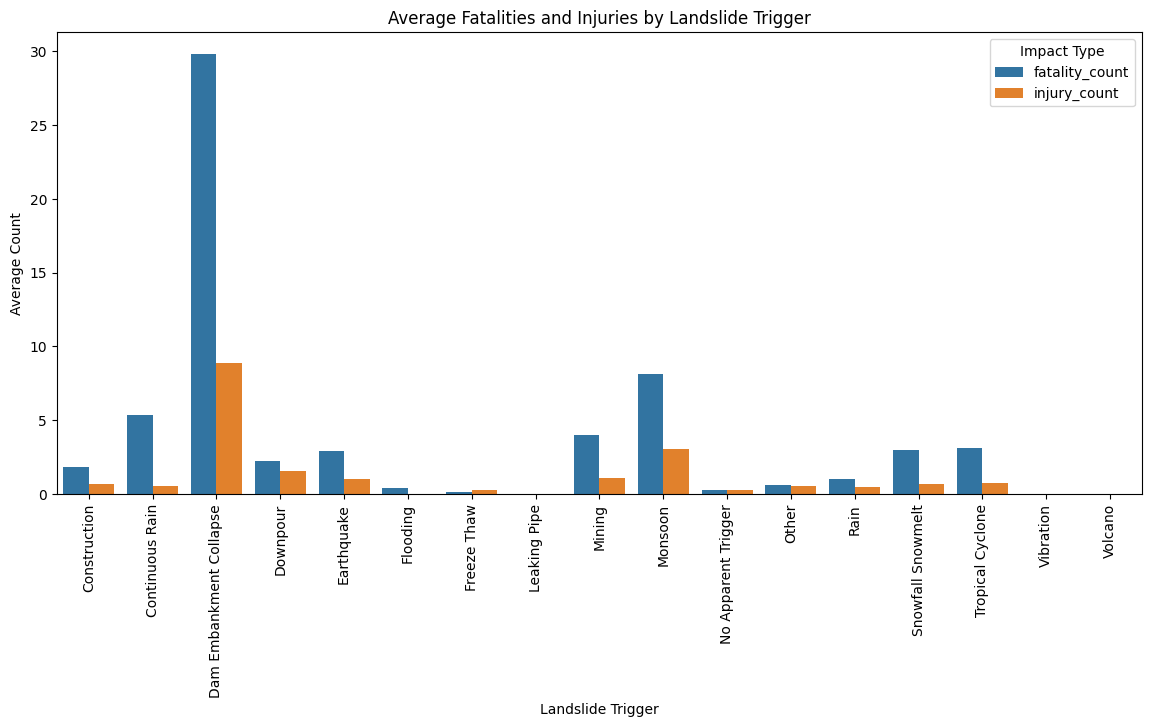

In [39]:
plt.figure(figsize=(14, 6))
sns.barplot(data=trigger_melted, x='landslide_trigger', y='Average Count', hue='Impact Type')
plt.title('Average Fatalities and Injuries by Landslide Trigger')
plt.xlabel('Landslide Trigger')
plt.ylabel('Average Count')
plt.xticks(rotation=90)
plt.show()

### Question 3: Of the most common landslide triggers, what is the most common size of landslides they cause?

In [40]:
top_triggers = df[df['landslide_trigger'] != 'unknown']['landslide_trigger'].value_counts().head(6)
top_triggers.head(6)

landslide_trigger
Rain                 1288
Downpour             1120
Continuous Rain       612
Tropical Cyclone      154
Snowfall Snowmelt     112
Monsoon                71
Name: count, dtype: int64

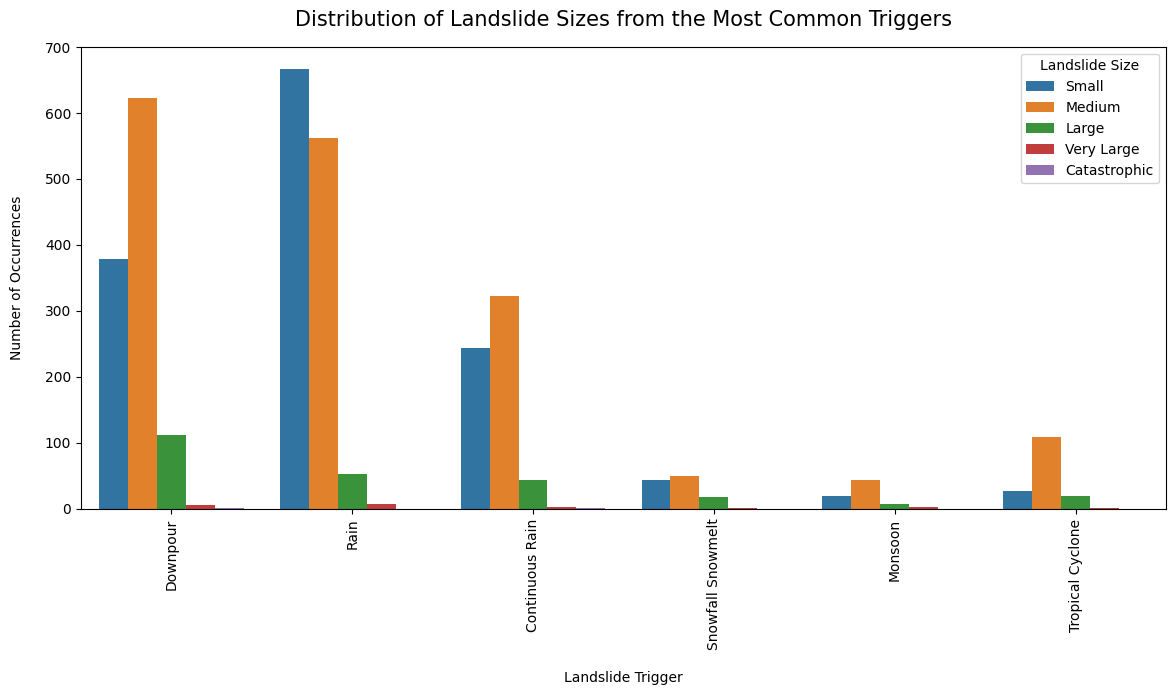

In [41]:
top_triggers_df = df[df['landslide_trigger'].isin(top_triggers.index.tolist())]

plt.figure(figsize=(14, 6))
sns.countplot(top_triggers_df, x = 'landslide_trigger', hue = 'landslide_size')
plt.title("Distribution of Landslide Sizes from the Most Common Triggers", fontsize = 15, pad = 15)
plt.xlabel("Landslide Trigger", labelpad = 15)
plt.ylabel("Number of Occurrences", labelpad = 15)
plt.xticks(rotation = 90)
plt.legend(title = "Landslide Size",
           labels = ['Small', 'Medium', 'Large', 'Very Large', 'Catastrophic'])
plt.show()